$$\Large\boxed{\text{AME 5202 Deep Learning, Even Semester 2026}}$$

$$\large\text{Theme}: \underline{\text{Training a simple 1-hidden layer neural network for classification and regression}}$$

---

Load essential libraries

---

In [1]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline
import sys
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

---

Mount Google Drive folder if running Google Colab

---

In [ ]:
## Mount Google drive folder if running in Colab
if('google.colab' in sys.modules):
    from google.colab import drive
    drive.mount('/content/drive', force_remount = True)
    DIR = '/content/drive/MyDrive/Colab Notebooks/MAHE/MSIS Coursework/EvenSem2026MAHE'
    DATA_DIR = DIR+'/Data/'
else:
    DATA_DIR = 'Data/'

---

Patient data matrix with output labels:

![patient dataset](https://1drv.ms/i/c/37720f927b6ddc34/UQQ03G17kg9yIIA3SKYBAAAAAJC-Ffd_ghqvEZE?width=800)

---

In [25]:
## Create the patient data matrix as a constant tensor
X = torch.tensor([[72, 120, 37.3, 104, 32.5],
                  [85, 130, 37.0, 110, 14],
                  [68, 110, 38.5, 125, 34],
                  [90, 140, 38.0, 130, 26],
                  [84, 132, 38.3, 146, 30],
                  [78, 128, 37.2, 102, 12]],
                  dtype = torch.float64)
print(f'Patient data matrix with 6 samples and 5 features:\n{X}')
print('-----')

# Create a 1D-numpy array of output labels (equivalent to a rank-1 tensor in
# PyTorch which itself is equivalent to a vector in pen & paper)
y = np.array(['non-diabetic',
              'diabetic',
              'non-diabetic',
              'pre-diabetic',
              'diabetic',
              'pre-diabetic'])
print(f'True output labels vector:\n {y}')
print('-----')

# Creating a one-hot encoder object
ohe = OneHotEncoder(sparse_output = False)

# Create the one-hot encoded true output labels matrix
Y = torch.tensor(ohe.fit_transform(y.reshape(-1, 1)), dtype = torch.float64)
print(f'One-hot encoded output labels matrix:\n {Y}')
print('-----')

# Standardize the data
sc = StandardScaler() # create a standard scaler object
X_std = torch.tensor(sc.fit_transform(X), dtype = torch.float64)
print(f'The standardized data matrix:\n{X_std}')

Patient data matrix with 6 samples and 5 features:
tensor([[ 72.0000, 120.0000,  37.3000, 104.0000,  32.5000],
        [ 85.0000, 130.0000,  37.0000, 110.0000,  14.0000],
        [ 68.0000, 110.0000,  38.5000, 125.0000,  34.0000],
        [ 90.0000, 140.0000,  38.0000, 130.0000,  26.0000],
        [ 84.0000, 132.0000,  38.3000, 146.0000,  30.0000],
        [ 78.0000, 128.0000,  37.2000, 102.0000,  12.0000]],
       dtype=torch.float64)
-----
True output labels vector:
 ['non-diabetic' 'diabetic' 'non-diabetic' 'pre-diabetic' 'diabetic'
 'pre-diabetic']
-----
One-hot encoded output labels matrix:
 tensor([[0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.]], dtype=torch.float64)
-----
The standardized data matrix:
tensor([[-0.9799, -0.7019, -0.7238, -0.9871,  0.8920],
        [ 0.7186,  0.3509, -1.2449, -0.6050, -1.2374],
        [-1.5025, -1.7547,  1.3607,  0.3503,  1.0647],
        [ 1.3718,  1.4037,  0.4922,  0.66

---

The ReLU (rectified linear unit) non-linear activation function: $$\begin{align*}g(z)&=\begin{cases}z,&\text{if }z\geq0,\\0,&\text{if }z<0.\end{cases}\end{align*}$$

Lets non-negative raw scores flow through and clips negative raw scores to zero:

![ReLU graph](https://1drv.ms/i/c/37720f927b6ddc34/IQQ2LpqSl9JMSKCzneksEc8CAXrRgpiM7O00yEnO9YUtbZA?width=562&height=200)

---

In [3]:
# User-defined function for pointwise ReLU activation
def ReLU(z):
  return(z * (z >= 0))

---

A one-hidden layer neural network, or equivalently a 2-layer neural network with pointwise ReLU activation for the hidden layer:


![2-layer neural network](https://1drv.ms/i/c/37720f927b6ddc34/IQTcIoux_NYvTKiIUEK_P3ffAY0ViDllOLNX8bhgeWSqE5g?width=660)



---

In [16]:
# Calculate raw scores for layer-1 by randomly initializing the weights matrix for layer-1
W1 = torch.nn.Parameter(torch.randn(5, 4, dtype = torch.float64)*0.01)
Z1 = X_std @ W1 # torch.matmul(X_std, W1)
#W1 = torch.linear(5, 4)
#Z1 = W1(X_std) 
print(f'The raw scores matrix for layer-1 with shape {list(Z1.shape)}:\n{Z1}')
print('-----')

# ReLU-activate the raw scores in layer-1
A1 = ReLU(Z1)
print(f'The ReLU-activated scores matrix for layer-1 with shape {list(A1.shape)}:\n{A1}')
print('-----')

# Calculate raw scores for layer-2 by randomly initializing the weights matrix for layer-2
W2 = torch.nn.Parameter(torch.randn(4, 3, dtype = torch.float64)*0.01)
Z2 = A1 @ W2 
print(f'The raw scores matrix for layer-2 with shape {list(Z2.shape)}:\n{Z2}')
print('-----')

# Softmax-activate the raw scores in layer-2
softmax = torch.nn.Softmax(dim = 1)
A2 = softmax(Z2)
print(f'The softmax-activated scores matrix for layer-2 with shape {list(A2.shape)}:\n{A2}')

The raw scores matrix for layer-1 with shape [6, 4]:
tensor([[ 0.0479, -0.0249, -0.0030,  0.0062],
        [-0.0119, -0.0089, -0.0056, -0.0272],
        [ 0.0113,  0.0294,  0.0104,  0.0500],
        [-0.0208, -0.0044, -0.0024, -0.0114],
        [-0.0319,  0.0281, -0.0018,  0.0015],
        [ 0.0055, -0.0192,  0.0025, -0.0190]], dtype=torch.float64,
       grad_fn=<MmBackward0>)
-----
The ReLU-activated scores matrix for layer-1 with shape [6, 4]:
tensor([[0.0479, -0.0000, -0.0000, 0.0062],
        [-0.0000, -0.0000, -0.0000, -0.0000],
        [0.0113, 0.0294, 0.0104, 0.0500],
        [-0.0000, -0.0000, -0.0000, -0.0000],
        [-0.0000, 0.0281, -0.0000, 0.0015],
        [0.0055, -0.0000, 0.0025, -0.0000]], dtype=torch.float64,
       grad_fn=<MulBackward0>)
-----
The raw scores matrix for layer-2 with shape [6, 3]:
tensor([[-4.8773e-04, -2.4236e-04,  5.0855e-04],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [-6.9533e-04,  9.9394e-04,  1.5483e-03],
        [ 0.0000e+00,  0

---

Using PyTorch, calculate the optimal weights $\mathbf{W}^{[1]}$ and $\mathbf{W}^{[2]}$ for the 2-layer neural network

---



In [30]:
# Create dictionary of weights
W = {
     1: torch.nn.Parameter(torch.randn(5, 4, dtype = torch.float64)*0.01),
     2: torch.nn.Parameter(torch.randn(4, 3, dtype = torch.float64)*0.01) 
     }

# Define optimizer
optimizer = torch.optim.Adam(W.items(), lr = 1e-02)

# Loss function
def loss_fn(X): # for which part of the data are we calculating the loss
  # Raw scores for layer-1
  Z1 = X @ W[1]

  # ReLU-activated scores for layer-1
  A1 = ReLU(Z1)

  # Raw scores for layer-2
  Z2 = A1 @ W[2]

  # Softmax-activated scores for layer-2
  softmax = torch.nn.Softmax(dim = 1)
  A2 = softmax(Z2)

  # Calculate the average training loss
  L = torch.mean(-torch.log(torch.sum(Y*A2, dim = 1)))
  return L

# Optimization loop
num_epochs = 1000
loss_train = np.empty(num_epochs)
for epoch in range(num_epochs):
  # Zero out the gradients
  optimizer.zero_grad()

  # Forward propagation (loss calculation)
  loss = loss_fn(X_std)

  # Backward propagation and optimization
  loss.backward()
  optimizer.step()

  # Print the loss every epoch
  loss_train[epoch] = loss.item()
  print(f'Epoch {epoch}, loss = {loss_train[epoch]}')

Epoch 0, loss = 1.0986294792198172
Epoch 1, loss = 1.0979071284380881
Epoch 2, loss = 1.0967686109876016
Epoch 3, loss = 1.095101427686352
Epoch 4, loss = 1.0927046450186169
Epoch 5, loss = 1.0895495359113303
Epoch 6, loss = 1.0855845164913422
Epoch 7, loss = 1.080740554196041
Epoch 8, loss = 1.0749715647129587
Epoch 9, loss = 1.0682483565205196
Epoch 10, loss = 1.0605504389978415
Epoch 11, loss = 1.0518648745367045
Epoch 12, loss = 1.0424468642621452
Epoch 13, loss = 1.0321372011988335
Epoch 14, loss = 1.020926948327578
Epoch 15, loss = 1.0088409987140445
Epoch 16, loss = 0.9959162651419136
Epoch 17, loss = 0.9821992382092221
Epoch 18, loss = 0.9677451168173814
Epoch 19, loss = 0.9526172976507263
Epoch 20, loss = 0.9368868694999222
Epoch 21, loss = 0.9206319319276058
Epoch 22, loss = 0.903936622342744
Epoch 23, loss = 0.887293684938658
Epoch 24, loss = 0.8700334802916051
Epoch 25, loss = 0.8523988112174083
Epoch 26, loss = 0.8349545757717166
Epoch 27, loss = 0.817617694918657
Epoch 28

---

Plot training loss curve

---

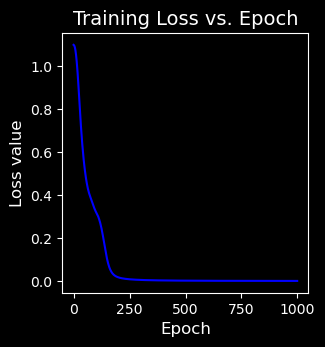

In [31]:
## Plot train loss as a function of epoch:
fig, ax = plt.subplots(1, 1, figsize = (4, 4))
fig.tight_layout(pad = 4.0)
ax.plot(loss_train, 'b')
ax.set_xlabel('Epoch', fontsize = 12)
ax.set_ylabel('Loss value', fontsize = 12)
ax.set_title('Training Loss vs. Epoch', fontsize = 14);

---

How good are the trained weights when applied to the training data?

---

In [32]:
with torch.no_grad():
  # Raw scores for layer-1
  Z1 = torch.matmul(X_std, W[1])

  # ReLU-activated scores for layer-1
  A1 = ReLU(Z1)

  # Raw scores for layer-2
  Z2 = torch.matmul(A1, W[2])

  # Softmax-activated scores for layer-2
  softmax = torch.nn.Softmax(dim = 1)
  A2 = softmax(Z2)

# Get predicted labels 
print(f'Predicted labels for training data: {A2.argmax(dim = 1)}')

# True output labels
print(f'True output labels: {Y.argmax(dim = 1)}')

Predicted labels for training data: tensor([1, 0, 1, 2, 0, 2])
True output labels: tensor([1, 0, 1, 2, 0, 2])


---

Loading the Bengaluru Hosueprice dataset and performing a train-test split

---

In [ ]:
## Load housing data
file = DATA_DIR+'houseprices_cleaned.csv'
df= pd.read_csv(file, header = 0).dropna()

## Train and test split of the data
X = df[['area', 'rent']]
y = df['price_per_sqft']
X_train, X_test, Y_train, Y_test = ?

# Standardize data
sc = StandardScaler()
X_train = ?
X_test = ?

# Convert train and test data to numpy arrays (note that Y should be a 1-column matrix)
X_train = torch.tensor(X_train, dtype = torch.float64)
X_test = torch.tensor(X_test, dtype = torch.float64)
Y_train = torch.tensor(Y_train.values, dtype = torch.float32).reshape(-1, 1)
Y_test = torch.tensor(Y_test.values, dtype = torch.float32).reshape(-1, 1)

num_samples = X_train.shape[0]
num_features = X_train.shape[1]

print('Housing data set')
print('---------------------')
print('Number of training samples = %d'%(num_samples))
print('Number of features = %d'%(num_features))

---

Using PyTorch, calculate the optimal weights $\mathbf{W}^{[1]}$ and $\mathbf{W}^{[2]}$ for the 2-layer neural network

---



In [ ]:
# Create dictionary of weights
W = {
     '1': torch.nn.Parameter(torch.randn(?, ?, dtype = torch.float64) * 0.01),
     '2': torch.nn.Parameter(torch.randn(?, ?, dtype = torch.float64) * 0.01)
     }

# Define optimizer
optimizer = torch.optim.Adam(W.items(), lr = 1e-02)

# Loss function
def loss_fn(X, Y):
  # Raw scores for layer-1
  Z1 = torch.matmul(X, W['1'])

  # ReLU-activated scores for layer-1
  A1 = ReLU(Z1)

  # Raw scores for layer-2
  Z2 = torch.matmul(A1, W['2'])

  # Calculate the average training loss
  L = ?
  return L

# Optimization loop
num_epochs = 50000
loss_train = np.empty(num_epochs)
loss_test = np.empty(num_epochs)
for epoch in range(num_epochs):
  # Zero out the gradients
  optimizer.zero_grad()

  # Forward propagation (loss calculation)
  loss = loss_fn(?, ?)   

  # Backward propagation and optimization
  loss.backward()
  optimizer.step()

  # Print the loss every 1000 epochs
  loss_train[epoch] = loss.item()
  # Test loss
  with torch.no_grad():
    loss = loss_fn(?, ?)
    loss_test[epoch] = loss.item()
  if epoch % 1000 == 0:
    print(f'Epoch {epoch}, train loss = {loss_train[epoch]}, test loss = {loss_test[epoch]}')

---

Plot train and test loss curves

---

In [ ]:
## Plot train and test loss as a function of epoch:
fig, ax = plt.subplots(1, 1, figsize = (4, 4))
fig.tight_layout(pad = 4.0)
ax.plot(loss_train, 'b', label = 'Train')
ax.plot(loss_test, 'r', label = 'Test')
ax.set_xlabel('Epoch', fontsize = 12)
ax.set_ylabel('Loss value', fontsize = 12)
ax.legend()
ax.set_title('Loss vs. Epoch', fontsize = 14);

---

How good are the trained weights when applied to the test data?

---

In [ ]:
with torch.no_grad():
  # Raw scores for layer-1
  Z1 = torch.matmul(?, ?)

  # ReLU-activated scores for layer-1
  A1 = ReLU(?)

  # Raw scores for layer-2
  Z2 = ?      

print(f'Test data true and predicted house prices {torch.hstack([?, ?])}')
